In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [6]:
model = keras.Sequential([layers.Dense(4096, activation="relu"),
                            layers.Dense(1024, activation="relu"),
                          layers.Dense(10, activation="softmax")])

In [7]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
model.fit(train_images, 
          train_labels, 
          epochs=10, 
          batch_size=128)

Epoch 1/10
469/469 [==============================] - 22s 45ms/step - loss: 0.2302 - accuracy: 0.9330
Epoch 2/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0908 - accuracy: 0.9734
Epoch 3/10
469/469 [==============================] - 24s 52ms/step - loss: 0.0657 - accuracy: 0.9815
Epoch 4/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0556 - accuracy: 0.9859
Epoch 5/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0447 - accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0380 - accuracy: 0.9904
Epoch 7/10
469/469 [==============================] - 27s 59ms/step - loss: 0.0382 - accuracy: 0.9914
Epoch 8/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0316 - accuracy: 0.9929
Epoch 9/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0257 - accuracy: 0.9940
Epoch 10/10
469/469 [==============================] - 28s 60ms/step - loss: 0.026

In [9]:
test_digits = test_images[0:10]

In [10]:
predictions = model.predict(test_digits)
predictions[0]

array([0.0000000e+00, 3.2045173e-24, 3.3995333e-27, 1.6374675e-26,
       3.9432275e-34, 2.7188011e-37, 0.0000000e+00, 1.0000000e+00,
       6.3038710e-37, 5.8406576e-29], dtype=float32)

In [11]:
np.argmax(predictions[0])

7

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 3s 7ms/step - loss: 0.1388 - accuracy: 0.9855
test_acc: 0.9854999780654907


## 2. Prepare and load your digits.

In [13]:
from matplotlib import image
import matplotlib.pyplot as plt

#### 2.1. Read the image files
Example of reading the **one** image file
```
img1 = image.imread('image_name.jpg')[:,:,0]
```

We use `[:, :, 0]` indexation to get 1 channel of RGB (off-color image)



In [14]:
# read all 5 image files in separate variables
img1 = image.imread('image.jpg')[:,:,0]
img2 = image.imread('image2.jpg')[:,:,0]
img3 = image.imread('image3.jpg')[:,:,0]
img4 = image.imread('image4.jpg')[:,:,0]
img5 = image.imread('image5.jpg')[:,:,0]
img6 = image.imread('image6.jpg')[:,:,0]
img7 = image.imread('image7.jpg')[:,:,0]
img8 = image.imread('image8.jpg')[:,:,0]
img9 = image.imread('image9.jpg')[:,:,0]
img10 = image.imread('image10.jpg')[:,:,0]


To show the **one specific** image:
```
plt.imshow(img1, cmap=plt.cm.gray);
```


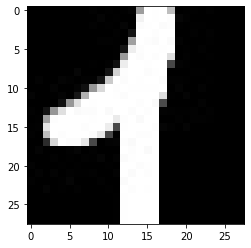

In [15]:
plt.imshow(img1, cmap=plt.cm.gray);


#### 2.2. Collect the images to one array
For example:
```
DIGITS = np.array([img1, img2, img3, ...])
```


In [16]:
DIGITS = np.array([img1, img2, img3,img4,img5,img6,img7,img8,img9,img10])

#### 2.3. Reshape the images and normalize the values of pixels (form 0 to 1)
```
reshaped_DIGITS = DIGITS.reshape(len(DIGITS), (28 * 28))
reshaped_DIGITS = reshaped_DIGITS.astype("float32") / 255
```

In [17]:
reshaped_DIGITS = DIGITS.reshape(len(DIGITS), (28 * 28))
reshaped_DIGITS = reshaped_DIGITS.astype("float32") / 255

## 3. Use the model for digit recognition. 

#### 3.1. Predict the digits using your model and save predictions to `PREDICTIONS`

In [18]:
predictions = model.predict(reshaped_DIGITS)
predictions

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.5320831e-37, 2.5123322e-37, 0.0000000e+00, 0.0000000e+00,
        2.5194194e-26, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.7513310e-32, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 5.9241393e-34, 0.0000000e+00, 2.7160933e-31,
        0.0000000e+00, 1.5940866e-30],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 4.7412996e-25, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.00

#### 3.2. Use the following code to show the predictions:
```
for i in range(len(reshaped_DIGITS)):
    print(f"This number is {np.argmax(PREDICTIONS[i])}")
    plt.imshow(np.reshape(reshaped_DIGITS[i], (28,28)), cmap=plt.cm.gray);
    plt.show();
```

This number is 9


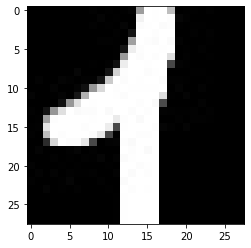

This number is 2


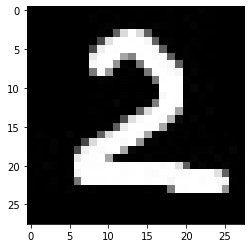

This number is 4


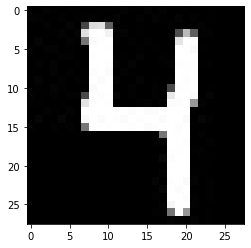

This number is 4


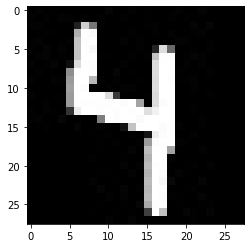

This number is 8


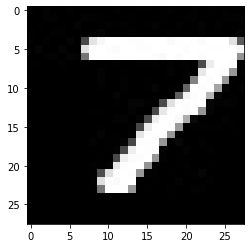

This number is 8


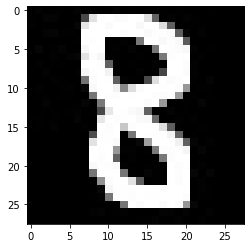

This number is 3


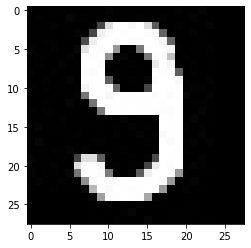

This number is 6


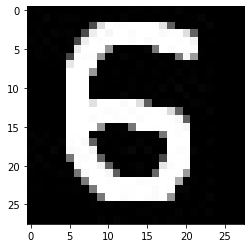

This number is 5


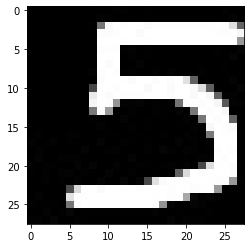

This number is 2


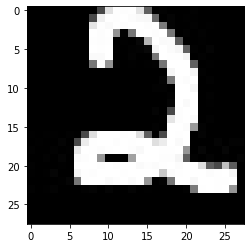

In [19]:
for i in range(len(reshaped_DIGITS)):
    print(f"This number is {np.argmax(predictions[i])}")
    plt.imshow(np.reshape(reshaped_DIGITS[i], (28,28)), cmap=plt.cm.gray);
    plt.show();